In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model training & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# File path (update if needed)
file_path = r"C:\Users\lenovo\Desktop\agricultural dataset.xlsx"

# Load sheets
crop_data = pd.read_excel(file_path, sheet_name="Crop and Horticulture", header=None)
livestock_data = pd.read_excel(file_path, sheet_name="Livestock")
cereals_data = pd.read_excel(file_path, sheet_name="Cereals")

# Quick checks
print("Crop & Horticulture shape:", crop_data.shape)
print("Livestock shape:", livestock_data.shape)
print("Cereals shape:", cereals_data.shape)

# Preview Cereals data
print("\nCereals preview:")
print(cereals_data.head())

Crop & Horticulture shape: (85, 30)
Livestock shape: (33, 20)
Cereals shape: (31, 5)

Cereals preview:
   Year     Item  Area harvested   Yield  Production
0  1993  Cereals         4040330  1313.0  5304825.00
1  1994  Cereals         5392277   974.4  5254031.58
2  1995  Cereals         6532410  1033.5  6751322.00
3  1996  Cereals         7736657  1213.6  9388992.55
4  1997  Cereals         7504650  1263.9  9484807.00


In [4]:
# Info and missing values
print("Dataset Info:")
print(cereals_data.info())

print("\nMissing Values:")
print(cereals_data.isna().sum())

# Summary statistics
print("\nSummary Statistics:")
print(cereals_data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            31 non-null     int64  
 1   Item            31 non-null     object 
 2   Area harvested  31 non-null     int64  
 3   Yield           31 non-null     float64
 4   Production      31 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB
None

Missing Values:
Year              0
Item              0
Area harvested    0
Yield             0
Production        0
dtype: int64

Summary Statistics:
              Year  Area harvested        Yield    Production
count    31.000000    3.100000e+01    31.000000  3.100000e+01
mean   2008.000000    9.011067e+06  1794.245161  1.710685e+07
std       9.092121    1.903841e+06   666.725071  8.911476e+06
min    1993.000000    4.040330e+06   974.400000  5.254032e+06
25%    2000.500000    7.620654e+06  1205.

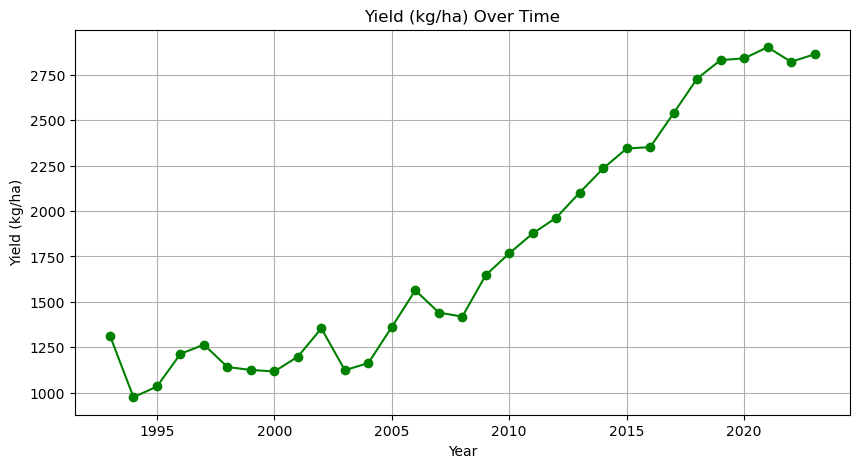

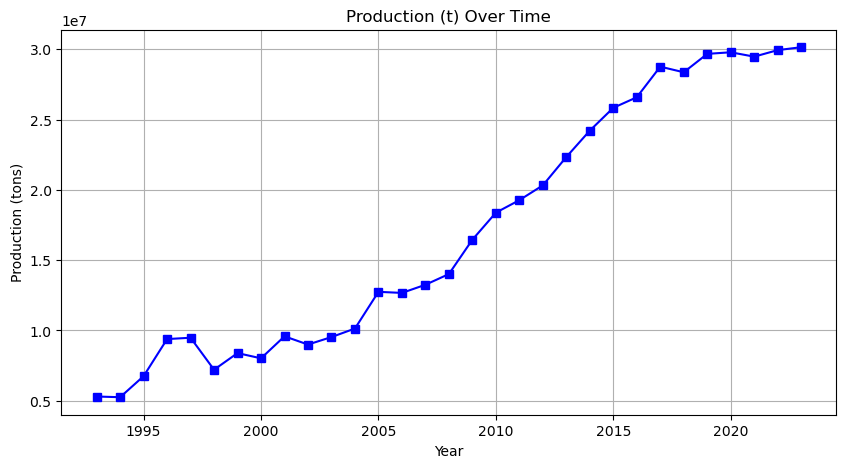

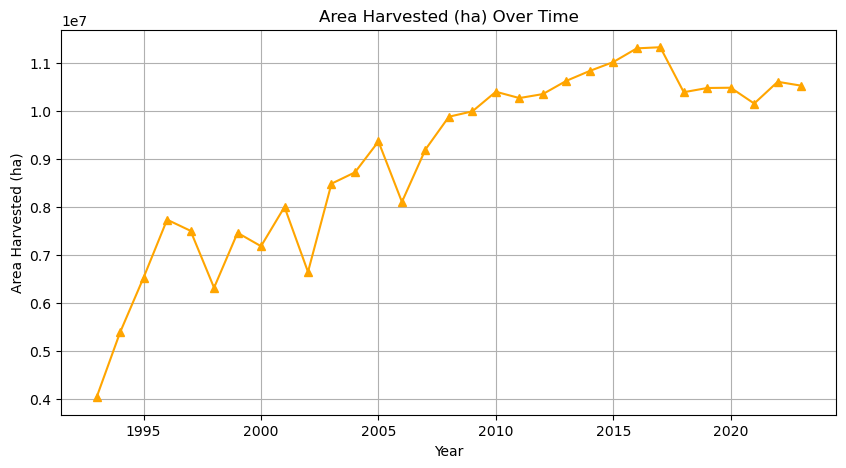

In [6]:
# Yield over time
plt.figure(figsize=(10,5))
plt.plot(cereals_data['Year'], cereals_data['Yield'], marker='o', color='green')
plt.title("Yield (kg/ha) Over Time")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.grid(True)
plt.show()

# Production over time
plt.figure(figsize=(10,5))
plt.plot(cereals_data['Year'], cereals_data['Production'], marker='s', color='blue')
plt.title("Production (t) Over Time")
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.grid(True)
plt.show()

# Area harvested over time
plt.figure(figsize=(10,5))
plt.plot(cereals_data['Year'], cereals_data['Area harvested'], marker='^', color='orange')
plt.title("Area Harvested (ha) Over Time")
plt.xlabel("Year")
plt.ylabel("Area Harvested (ha)")
plt.grid(True)
plt.show()


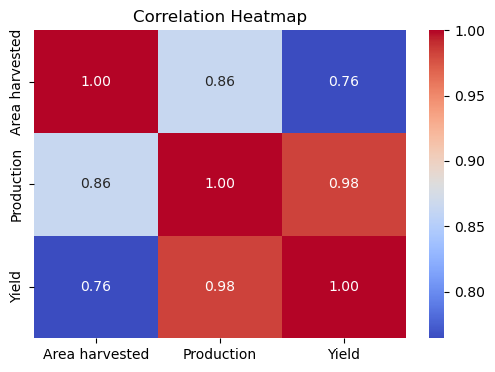

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(cereals_data[['Area harvested','Production','Yield']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


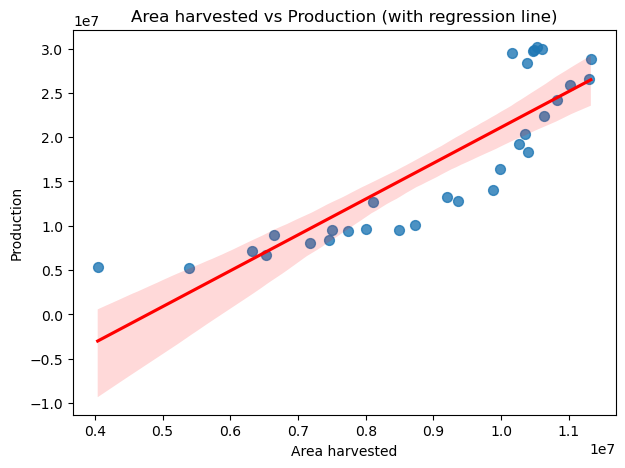

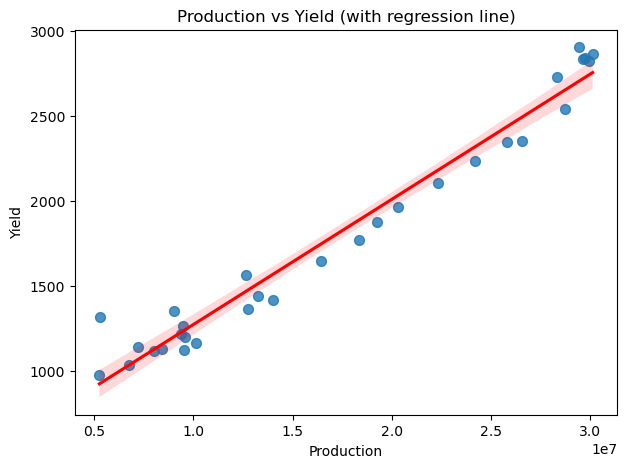

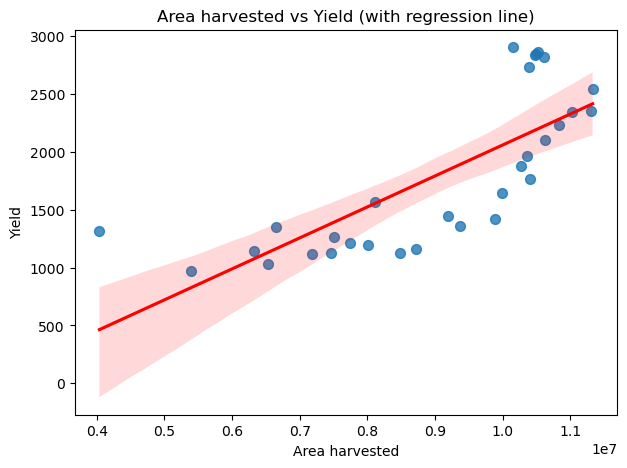

In [9]:
# Area harvested vs Production
plt.figure(figsize=(7,5))
sns.regplot(x='Area harvested', y='Production', data=cereals_data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("Area harvested vs Production (with regression line)")
plt.show()

# Production vs Yield
plt.figure(figsize=(7,5))
sns.regplot(x='Production', y='Yield', data=cereals_data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("Production vs Yield (with regression line)")
plt.show()

# Area harvested vs Yield
plt.figure(figsize=(7,5))
sns.regplot(x='Area harvested', y='Yield', data=cereals_data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("Area harvested vs Yield (with regression line)")
plt.show()


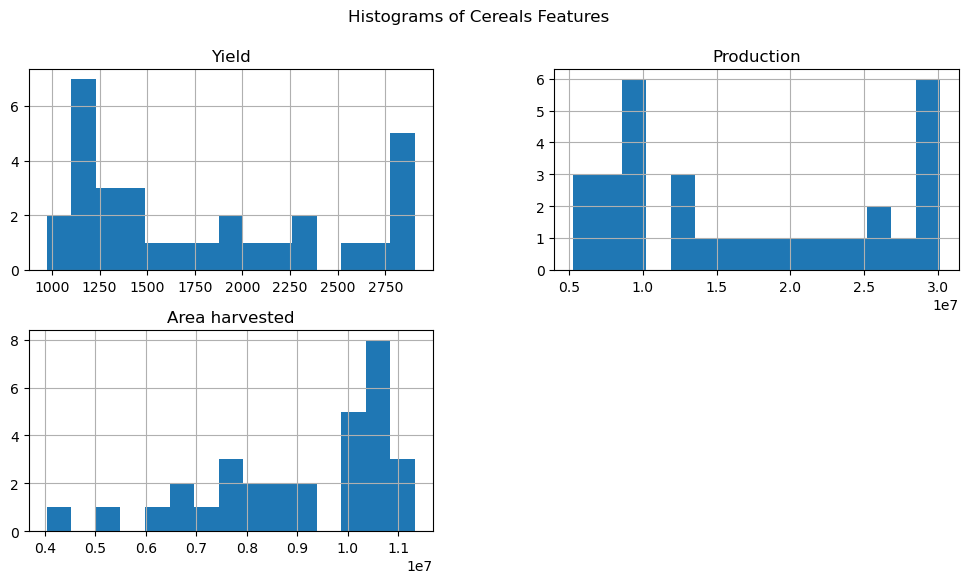

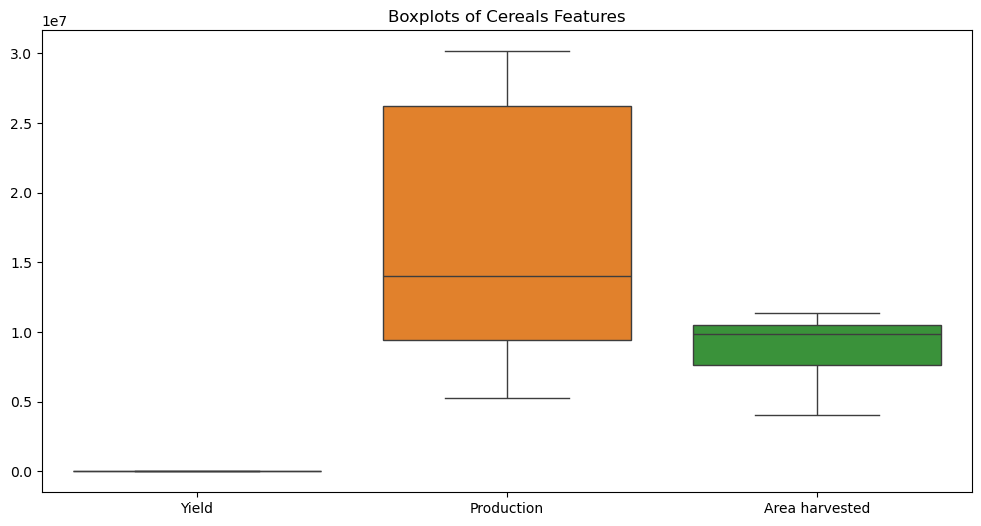

In [10]:
# Histograms
cereals_data[['Yield','Production','Area harvested']].hist(bins=15, figsize=(12,6))
plt.suptitle("Histograms of Cereals Features")
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=cereals_data[['Yield','Production','Area harvested']])
plt.title("Boxplots of Cereals Features")
plt.show()


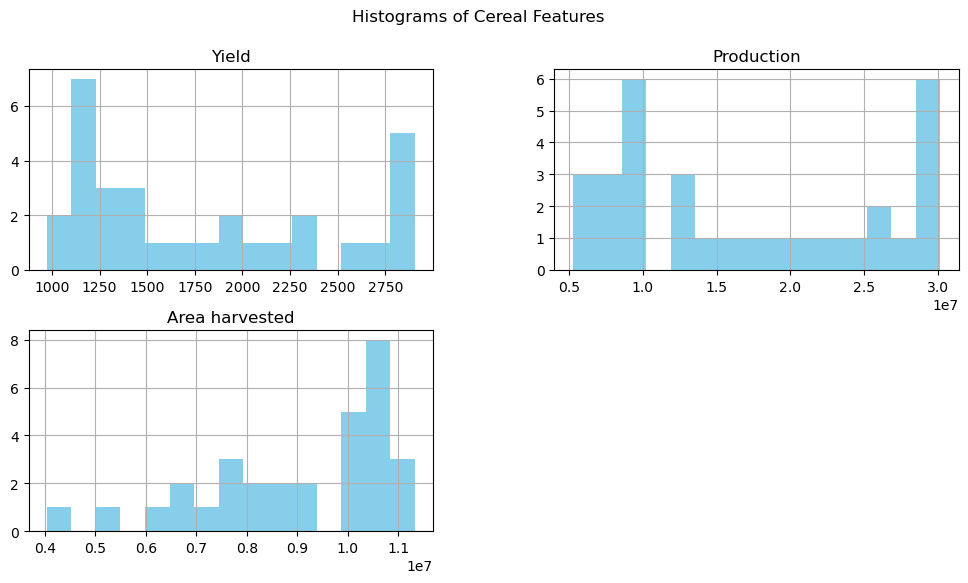

In [11]:
cereals_data[['Yield','Production','Area harvested']].hist(bins=15, figsize=(12,6), color="skyblue")
plt.suptitle("Histograms of Cereal Features")
plt.show()


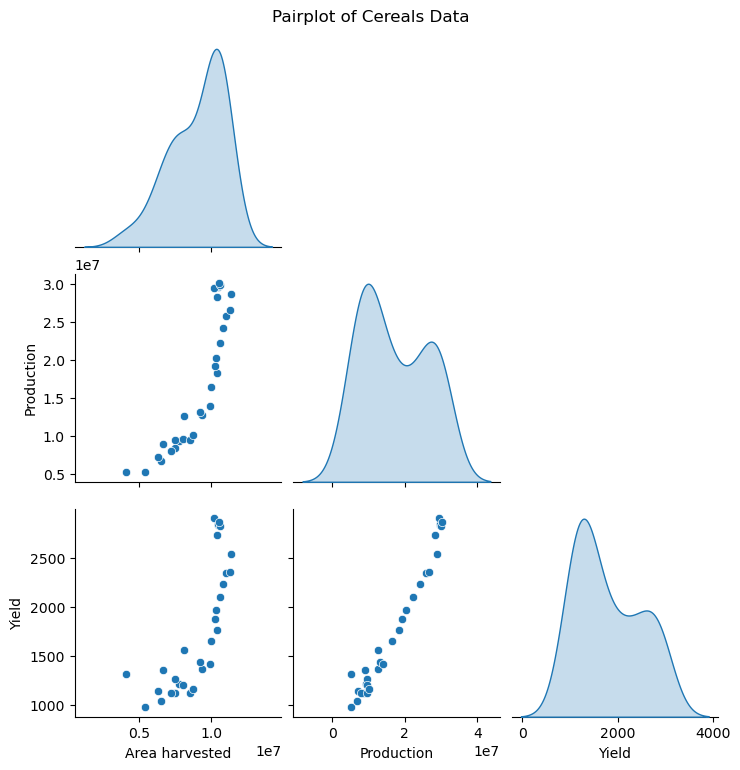

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for main numeric features
sns.pairplot(cereals_data[['Area harvested', 'Production', 'Yield']], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Cereals Data", y=1.02)
plt.show()

In [13]:
# Features (X) and Target (y)
X = cereals_data[['Area harvested', 'Production']]
y = cereals_data['Yield']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Quick check
print("\nX preview:")
print(X.head())
print("\nTarget preview:")
print(y.head())


Feature shape: (31, 2)
Target shape: (31,)

X preview:
   Area harvested  Production
0         4040330  5304825.00
1         5392277  5254031.58
2         6532410  6751322.00
3         7736657  9388992.55
4         7504650  9484807.00

Target preview:
0    1313.0
1     974.4
2    1033.5
3    1213.6
4    1263.9
Name: Yield, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (24, 2)
X_test shape: (7, 2)
y_train shape: (24,)
y_test shape: (7,)


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train/test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training feature sample:\n", X_train_scaled[:5])


Scaled training feature sample:
 [[ 1.29653197  1.42225478]
 [ 0.27613845 -0.41627093]
 [-2.49312651 -1.27104298]
 [-0.69140352 -0.79114311]
 [ 0.60212397  0.00934681]]


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Results:")
print("RMSE:", rmse)
print("R² Score:", r2)

Gradient Boosting Results:
RMSE: 98.02857717630734
R² Score: 0.9772190973915944


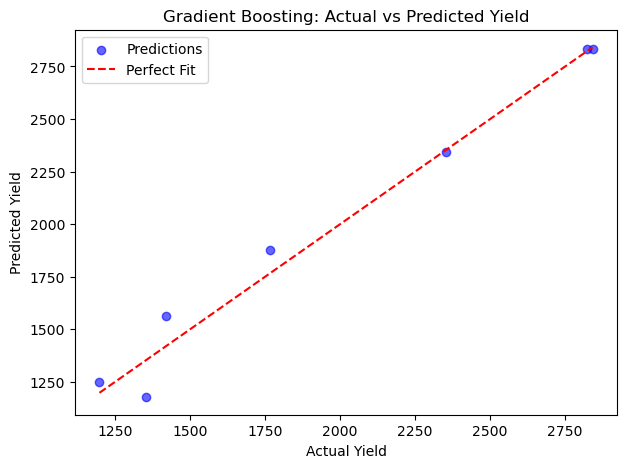

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Gradient Boosting: Actual vs Predicted Yield")
plt.legend()
plt.show()


Random Forest Results:
RMSE: 112.51682445813525
R² Score: 0.969987618221086


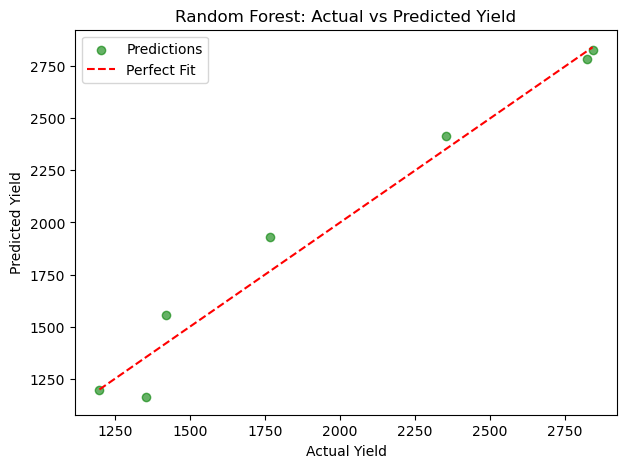

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

# Visualization: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest: Actual vs Predicted Yield")
plt.legend()
plt.show()

Extra Trees Results:
RMSE: 92.79490560274047
R² Score: 0.9795866727604721


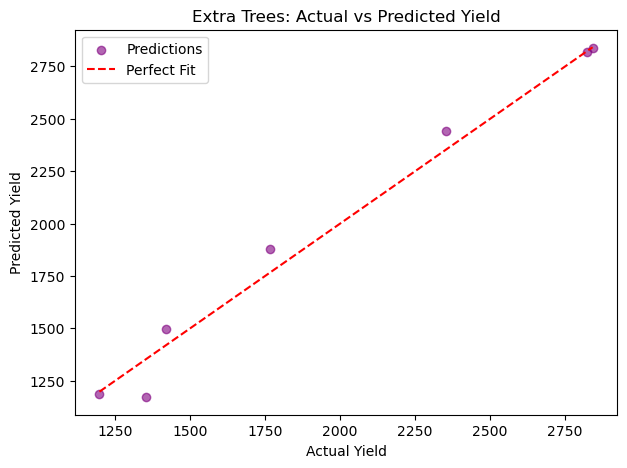

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Extra Trees
et = ExtraTreesRegressor(random_state=42, n_estimators=200)

# Train
et.fit(X_train, y_train)

# Predict
y_pred_et = et.predict(X_test)

# Evaluate
rmse_et = np.sqrt(mean_squared_error(y_test, y_pred_et))
r2_et = r2_score(y_test, y_pred_et)

print("Extra Trees Results:")
print("RMSE:", rmse_et)
print("R² Score:", r2_et)

# Visualization: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_et, color='purple', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Extra Trees: Actual vs Predicted Yield")
plt.legend()
plt.show()

In [21]:
import pandas as pd

# Collect results into a dictionary
results = {
    "Model": ["Gradient Boosting", "Random Forest", "Extra Trees"],
    "RMSE": [rmse, rmse_rf, rmse_et],
    "R² Score": [r2, r2_rf, r2_et]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("📊 Model Performance Comparison")
print(results_df)


📊 Model Performance Comparison
               Model        RMSE  R² Score
0  Gradient Boosting   98.028577  0.977219
1      Random Forest  112.516824  0.969988
2        Extra Trees   92.794906  0.979587


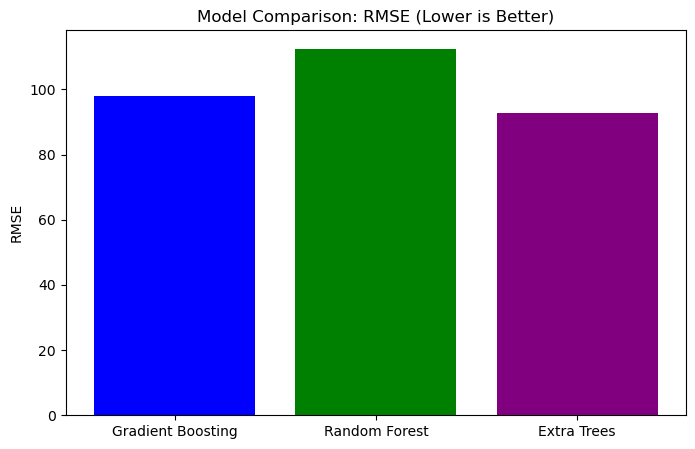

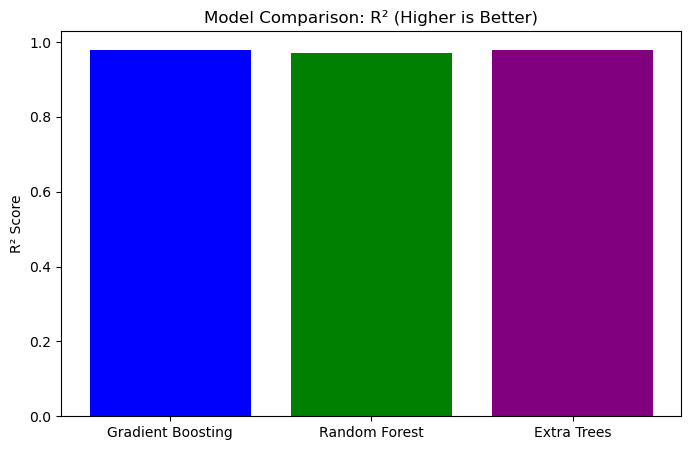

In [22]:
import matplotlib.pyplot as plt

# RMSE comparison
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue','green','purple'])
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE (Lower is Better)")
plt.show()

# R² comparison
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['R² Score'], color=['blue','green','purple'])
plt.ylabel("R² Score")
plt.title("Model Comparison: R² (Higher is Better)")
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_depth': [None, 5, 10, 15],        # tree depth
    'min_samples_split': [2, 5, 10],       # min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # min samples per leaf
    'max_features': ['sqrt', 'log2']  # number of features considered
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Calculate RMSE and R² for the best model on the test set
test_mse = mean_squared_error(y_test, y_pred_best)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_best)

print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score (CV): 0.8812477084354617
Test RMSE: 156.70771121621576
Test R²: 0.9417834769007194
